In [29]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import os
from os import listdir
from os.path import isfile, join


In [30]:
# Merge df together

#df_all = pd.concat([df_jj])

In [31]:
# Merge df together

df_jj = pd.read_pickle("JJStats.pkl", compression="bz2")
df_emil = pd.read_pickle("EmilStats.pkl", compression="bz2")
df_fred = pd.read_pickle("FredStats.pkl", compression="bz2")
df_josh = pd.read_pickle("JoshStats.pkl", compression="bz2")
df_liam = pd.read_pickle("LiamStats.pkl", compression="bz2")
df_toby = pd.read_pickle("TobyStats.pkl", compression="bz2")

In [32]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int
}

df_jj = df_jj.astype(type, errors="ignore")
df_jj.dropna(how="any", inplace=True)
df_jj['Score'] = df_jj['Score'].str.replace(" / ", ":")

df_emil = df_emil.astype(type, errors="ignore")
df_emil.dropna(how="any", inplace=True)
df_emil['Score'] = df_emil['Score'].str.replace(" / ", ":")

df_fred = df_fred.astype(type, errors="ignore")
df_fred.dropna(how="any", inplace=True)
df_fred['Score'] = df_fred['Score'].str.replace(" / ", ":")

df_josh = df_josh.astype(type, errors="ignore")
df_josh.dropna(how="any", inplace=True)
df_josh['Score'] = df_josh['Score'].str.replace(" / ", ":")

df_liam = df_liam.astype(type, errors="ignore")
df_liam.dropna(how="any", inplace=True)
df_liam['Score'] = df_liam['Score'].str.replace(" / ", ":")

df_toby = df_toby.astype(type, errors="ignore")
df_toby.dropna(how="any", inplace=True)
df_toby['Score'] = df_toby['Score'].str.replace(" / ", ":")


In [33]:
# Clean CreateAt Column

df_jj['CreatedAt'] = df_jj['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_jj= df_jj[df_jj['CreatedAt'].str.len() > 22]

df_emil['CreatedAt'] = df_emil['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_emil= df_emil[df_emil['CreatedAt'].str.len() > 22]

df_fred['CreatedAt'] = df_fred['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_fred= df_fred[df_fred['CreatedAt'].str.len() > 22]

#df_josh['CreatedAt'] = df_josh['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
#df_josh= df_josh[df_josh['CreatedAt'].str.len() > 22]

df_liam['CreatedAt'] = df_liam['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_liam= df_liam[df_liam['CreatedAt'].str.len() > 22]

df_toby['CreatedAt'] = df_toby['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_toby= df_toby[df_toby['CreatedAt'].str.len() > 22]

df_all = pd.concat([df_jj, df_emil, df_fred, df_josh, df_liam, df_toby])
df_all

,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills,DateOrdinal,Year,Month,Date
0,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,6,3,33,de_ancient,409c8bab-ff43-4d18-92e8-043932a9638a,2,0.30,9,...,2023-09-26T23:20:33.756,3,20,0,csgo,0,NaN,NaN,NaN,NaN
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,de_anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,2023-09-26T22:27:04.491,2,26,1,csgo,0,NaN,NaN,NaN,NaN
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,de_overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,2023-09-26T21:12:04.215,1,17,1,csgo,0,NaN,NaN,NaN,NaN
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,de_mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,2023-09-18T19:28:20.413,1,21,2,csgo,0,NaN,NaN,NaN,NaN
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,de_inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,2023-09-17T20:55:33.525,1,13,1,csgo,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,team_RelyBeat,1-06fdf079-17fb-4c7d-9c39-2095136e3243,19,1,26,de_inferno,42e160fc-2651-4fa5-9a9b-829199e27adb,5,1.00,9,...,2020-06-03T18:08:57.913,1,19,1,csgo,0,NaN,NaN,NaN,NaN
1908,Penis_Club,1-93e7f5e0-5a27-47ee-b04d-dc571fc55b80,17,1,59,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,6,0.74,12,...,2020-05-27T21:03:27.239,1,23,0,csgo,0,NaN,NaN,NaN,NaN
1909,team_Pot8ers,1-b8779d40-9d0d-49c0-8f5c-945629900b0e,19,1,37,de_train,42e160fc-2651-4fa5-9a9b-829199e27adb,5,0.68,16,...,2020-05-23T23:02:21.755,1,28,0,csgo,0,NaN,NaN,NaN,NaN
1910,team_rob_keke,1-2cf65a2a-1b29-4688-8116-5b990b4bdc79,33,1,39,de_train,42e160fc-2651-4fa5-9a9b-829199e27adb,7,1.83,16,...,2020-05-23T13:52:35.442,1,18,1,csgo,0,NaN,NaN,NaN,NaN


In [34]:
df_all['CreatedAt'] = df_all['CreatedAt'].astype("datetime64[ns]")
df_all["DateOrdinal"] = df_all['CreatedAt'].apply(lambda x: x.toordinal())


df_all["Year"] = df_all['CreatedAt'].dt.year
df_all["Month"] = df_all['CreatedAt'].dt.month
df_all["Date"] = df_all['CreatedAt'].dt.day
df_all

,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills,DateOrdinal,Year,Month,Date
0,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,6,3,33,de_ancient,409c8bab-ff43-4d18-92e8-043932a9638a,2,0.30,9,...,2023-09-26 23:20:33.756,3,20,0,csgo,0,738789,2023,9,26
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,de_anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,2023-09-26 22:27:04.491,2,26,1,csgo,0,738789,2023,9,26
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,de_overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,2023-09-26 21:12:04.215,1,17,1,csgo,0,738789,2023,9,26
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,de_mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,2023-09-18 19:28:20.413,1,21,2,csgo,0,738781,2023,9,18
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,de_inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,2023-09-17 20:55:33.525,1,13,1,csgo,0,738780,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,team_RelyBeat,1-06fdf079-17fb-4c7d-9c39-2095136e3243,19,1,26,de_inferno,42e160fc-2651-4fa5-9a9b-829199e27adb,5,1.00,9,...,2020-06-03 18:08:57.913,1,19,1,csgo,0,737579,2020,6,3
1908,Penis_Club,1-93e7f5e0-5a27-47ee-b04d-dc571fc55b80,17,1,59,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,6,0.74,12,...,2020-05-27 21:03:27.239,1,23,0,csgo,0,737572,2020,5,27
1909,team_Pot8ers,1-b8779d40-9d0d-49c0-8f5c-945629900b0e,19,1,37,de_train,42e160fc-2651-4fa5-9a9b-829199e27adb,5,0.68,16,...,2020-05-23 23:02:21.755,1,28,0,csgo,0,737568,2020,5,23
1910,team_rob_keke,1-2cf65a2a-1b29-4688-8116-5b990b4bdc79,33,1,39,de_train,42e160fc-2651-4fa5-9a9b-829199e27adb,7,1.83,16,...,2020-05-23 13:52:35.442,1,18,1,csgo,0,737568,2020,5,23


In [35]:
rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_all = df_all.replace({"Map": rename_all_maps})
df_all.sort_values(by="CreatedAt", ascending=True)
df_all = df_all.groupby('Map').filter(lambda x: len(x)>3)

df_all

,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills,DateOrdinal,Year,Month,Date
0,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,6,3,33,Ancient,409c8bab-ff43-4d18-92e8-043932a9638a,2,0.30,9,...,2023-09-26 23:20:33.756,3,20,0,csgo,0,738789,2023,9,26
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,Anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,2023-09-26 22:27:04.491,2,26,1,csgo,0,738789,2023,9,26
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,Overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,2023-09-26 21:12:04.215,1,17,1,csgo,0,738789,2023,9,26
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,Mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,2023-09-18 19:28:20.413,1,21,2,csgo,0,738781,2023,9,18
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,Inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,2023-09-17 20:55:33.525,1,13,1,csgo,0,738780,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,team_RelyBeat,1-06fdf079-17fb-4c7d-9c39-2095136e3243,19,1,26,Inferno,42e160fc-2651-4fa5-9a9b-829199e27adb,5,1.00,9,...,2020-06-03 18:08:57.913,1,19,1,csgo,0,737579,2020,6,3
1908,Penis_Club,1-93e7f5e0-5a27-47ee-b04d-dc571fc55b80,17,1,59,Mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,6,0.74,12,...,2020-05-27 21:03:27.239,1,23,0,csgo,0,737572,2020,5,27
1909,team_Pot8ers,1-b8779d40-9d0d-49c0-8f5c-945629900b0e,19,1,37,Train,42e160fc-2651-4fa5-9a9b-829199e27adb,5,0.68,16,...,2020-05-23 23:02:21.755,1,28,0,csgo,0,737568,2020,5,23
1910,team_rob_keke,1-2cf65a2a-1b29-4688-8116-5b990b4bdc79,33,1,39,Train,42e160fc-2651-4fa5-9a9b-829199e27adb,7,1.83,16,...,2020-05-23 13:52:35.442,1,18,1,csgo,0,737568,2020,5,23


In [36]:
# df_all broken down
#PLAYER IDS

JASON = "9a3bf080-a281-4e45-b1c8-2a90c7423d25"
TOBY = "fa9391e0-8ad4-48f5-9240-d66d5932507c"
JOSH = "838d4924-3056-43d2-bdc2-5b4b7e820cef"
FREDDIE = "563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5"
EMIL = "ef7b73df-1e6d-47bb-9072-50ba5a5de51a"
LIAM = "8ed6f299-4b39-4f59-b979-ec19f8308e71"

df_jj = df_all.query("PlayerId == @JASON")
df_toby = df_all.query("PlayerId == @TOBY")
df_josh = df_all.query("PlayerId == @JOSH")
df_fred = df_all.query("PlayerId == @FREDDIE")
df_emil = df_all.query("PlayerId == @EMIL")
df_liam = df_all.query("PlayerId == @LIAM")

In [37]:
#Displaying Map stats

# map stats jason
Maps_Stats_df_jj = (
    df_jj.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)

# map stats toby
Maps_Stats_df_toby = (
    df_toby.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)

# map stats josh
Maps_Stats_df_josh = (
    df_josh.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)

# map stats freddie
Maps_Stats_df_fred = (
    df_fred.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)

# map stats emil
Maps_Stats_df_emil = (
    df_emil.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)

# map stats liam
Maps_Stats_df_liam = (
    df_liam.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


Maps_Stats_df_jj["Losses"] = (Maps_Stats_df_jj["Matches"] - Maps_Stats_df_jj["Wins"]).astype(int)
Maps_Stats_df_jj["Winrate%"] = (((Maps_Stats_df_jj["Wins"] / Maps_Stats_df_jj["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_jj["Headshots"] = (Maps_Stats_df_jj["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_jj["Headshots%"] = (Maps_Stats_df_jj["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_jj["Matches"].astype(int)
Maps_Stats_df_jj.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_toby["Losses"] = (Maps_Stats_df_toby["Matches"] - Maps_Stats_df_toby["Wins"]).astype(int)
Maps_Stats_df_toby["Winrate%"] = (((Maps_Stats_df_toby["Wins"] / Maps_Stats_df_toby["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_toby["Headshots"] = (Maps_Stats_df_toby["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_toby["Headshots%"] = (Maps_Stats_df_toby["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_toby["Matches"].astype(int)
Maps_Stats_df_toby.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_josh["Losses"] = (Maps_Stats_df_josh["Matches"] - Maps_Stats_df_josh["Wins"]).astype(int)
Maps_Stats_df_josh["Winrate%"] = (((Maps_Stats_df_josh["Wins"] / Maps_Stats_df_josh["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_josh["Headshots"] = (Maps_Stats_df_josh["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_josh["Headshots%"] = (Maps_Stats_df_josh["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_josh["Matches"].astype(int)
Maps_Stats_df_josh.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_fred["Losses"] = (Maps_Stats_df_fred["Matches"] - Maps_Stats_df_fred["Wins"]).astype(int)
Maps_Stats_df_fred["Winrate%"] = (((Maps_Stats_df_fred["Wins"] / Maps_Stats_df_fred["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_fred["Headshots"] = (Maps_Stats_df_fred["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_fred["Headshots%"] = (Maps_Stats_df_fred["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_fred["Matches"].astype(int)
Maps_Stats_df_fred.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_emil["Losses"] = (Maps_Stats_df_emil["Matches"] - Maps_Stats_df_emil["Wins"]).astype(int)
Maps_Stats_df_emil["Winrate%"] = (((Maps_Stats_df_emil["Wins"] / Maps_Stats_df_emil["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_emil["Headshots"] = (Maps_Stats_df_emil["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_emil["Headshots%"] = (Maps_Stats_df_emil["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_emil["Matches"].astype(int)
Maps_Stats_df_emil.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_liam["Losses"] = (Maps_Stats_df_liam["Matches"] - Maps_Stats_df_liam["Wins"]).astype(int)
Maps_Stats_df_liam["Winrate%"] = (((Maps_Stats_df_liam["Wins"] / Maps_Stats_df_liam["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_liam["Headshots"] = (Maps_Stats_df_liam["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_liam["Headshots%"] = (Maps_Stats_df_liam["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_liam["Matches"].astype(int)
Maps_Stats_df_liam.sort_values(by="Matches", ascending=False, inplace=True)

C:\Users\jaceh\AppData\Local\Temp\ipykernel_31896\1857139545.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_jj.groupby(by="Map").aggregate(
C:\Users\jaceh\AppData\Local\Temp\ipykernel_31896\1857139545.py:21: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_toby.groupby(by="Map").aggregate(
C:\Users\jaceh\AppData\Local\Temp\ipykernel_31896\1857139545.py:37: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_josh.groupby(by="Map").

In [38]:
#Maps_Stats_df_fred

In [39]:
#Maps_Stats_df_fred

In [40]:
Maps_Stats_df_jj

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,528,9413,1564,9465,1308,8.11,46.04,265,263,50.19
Inferno,377,6968,1205,6994,1007,8.80,47.66,189,188,50.13
Train,203,3851,700,3671,558,8.33,44.53,115,88,56.65
Overpass,177,3167,609,3346,431,7.63,42.62,97,80,54.80
Cache,154,2798,513,2828,404,7.53,42.68,84,70,54.55
Nuke,101,1780,365,1901,262,7.90,45.31,50,51,49.50
Vertigo,64,1196,271,1251,175,8.27,44.77,36,28,56.25
Dust2,35,596,117,728,58,8.43,50.17,7,28,20.00
Ancient,15,232,52,298,32,5.40,34.73,6,9,40.00


In [41]:
#Maps_Stats_df_josh

In [42]:
#Maps_Stats_df_liam

In [43]:
#Maps_Stats_df_toby

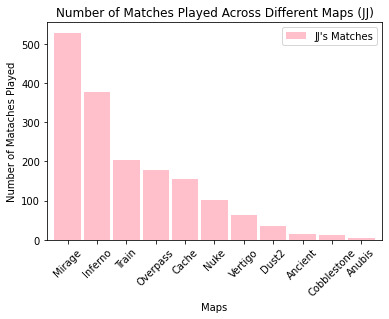

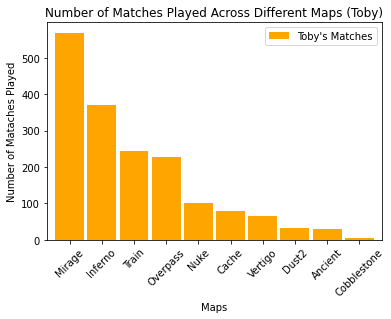

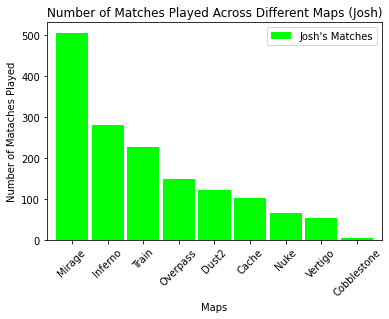

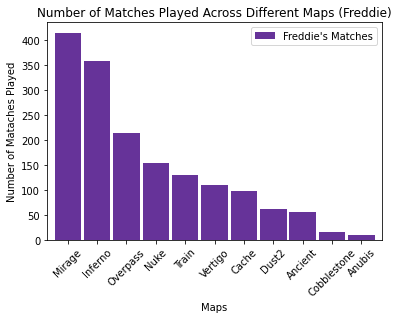

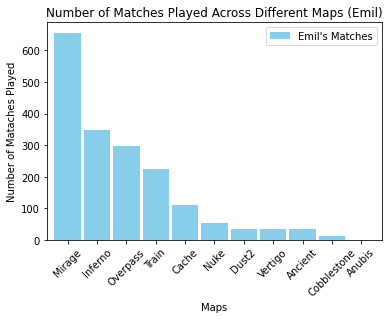

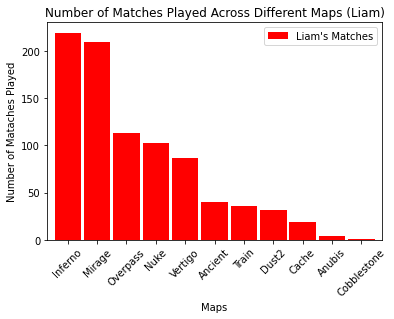

In [44]:
#Number of matches played across different maps (jj)
Maps_Stats_df_jj.plot.bar(y = "Matches", color = "pink", title = 'Number of Matches Played Across Different Maps (JJ)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["JJ's Matches"])

#plt.show()

#Number of matches played across different maps (toby)
Maps_Stats_df_toby.plot.bar(y = "Matches", color = "orange", title = 'Number of Matches Played Across Different Maps (Toby)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["Toby's Matches"])

#plt.show()


#Number of matches played across different maps (josh)
Maps_Stats_df_josh.plot.bar(y = "Matches", color = "lime", title = 'Number of Matches Played Across Different Maps (Josh)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["Josh's Matches"])

#plt.show()

#Number of matches played across different maps (fred)
Maps_Stats_df_fred.plot.bar(y = "Matches", color = "rebeccapurple", title = 'Number of Matches Played Across Different Maps (Freddie)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["Freddie's Matches"])

#plt.show()


#Number of matches played across different maps (Emil)
Maps_Stats_df_emil.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps (Emil)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["Emil's Matches"])

#plt.show()

#Number of matches played across different maps (Liam)
Maps_Stats_df_liam.plot.bar(y = "Matches", color = "red", title = 'Number of Matches Played Across Different Maps (Liam)', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')
plt.legend(["Liam's Matches"])


plt.show()



In [46]:
playerid_df_all = df_all
playerid_df_all = playerid_df_all.rename(columns={"PlayerId": "PlayerName"})
playerid_df_all = playerid_df_all.groupby(by=["PlayerName"]).aggregate(
    {
        "Kills": sum,
        "Assists": sum,
        "Deaths": sum,
        "Mvps": sum,
        "Headshots": 'mean',
        "Headshots%": 'mean',
        "Map": "count",
        "Rounds": sum,
        "Result": sum,
        "TripleKills": sum,
        "QuadroKills": sum,
        "PentaKills": sum
    }
).rename(
    columns={
        "Map": "Matches", 
        "Result": "Wins"
    },
    index={
        "9a3bf080-a281-4e45-b1c8-2a90c7423d25": 'Jason',
        "fa9391e0-8ad4-48f5-9240-d66d5932507c": 'Toby',
        "838d4924-3056-43d2-bdc2-5b4b7e820cef": 'Josh',
        "563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5": 'Freddie',
        "ef7b73df-1e6d-47bb-9072-50ba5a5de51a": 'Emil',
        "8ed6f299-4b39-4f59-b979-ec19f8308e71": 'Liam'}
    #axis=1
    )

C:\Users\jaceh\AppData\Local\Temp\ipykernel_31896\1184565367.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  playerid_df_all = playerid_df_all.groupby(by=["PlayerName"]).aggregate(
C:\Users\jaceh\AppData\Local\Temp\ipykernel_31896\1184565367.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  playerid_df_all = playerid_df_all.groupby(by=["PlayerName"]).aggregate(


In [54]:
playerid_df_all["Losses"] = (playerid_df_all["Matches"] - playerid_df_all["Wins"]).astype(int)
playerid_df_all["Winrate%"] = (((playerid_df_all["Wins"] / playerid_df_all["Matches"]) * 100).round(2)).astype(float)
playerid_df_all["Headshots"] = (playerid_df_all["Headshots"].apply(lambda x: round(x,2))).astype(float)
playerid_df_all["Headshots%"] = (playerid_df_all["Headshots%"].apply(lambda x: round(x,2))).astype(float)
playerid_df_all["Matches"].astype(int)
playerid_df_all["K/D"] = ((playerid_df_all["Kills"] / playerid_df_all["Deaths"]).round(2)).astype(float)
playerid_df_all["K/A"] = ((playerid_df_all["Kills"] / playerid_df_all["Assists"]).round(2)).astype(float)
playerid_df_all["K/R"] = ((playerid_df_all["Kills"] / playerid_df_all["Rounds"]).round(2)).astype(float)
playerid_df_all["Avg 3k / Matches"] = ((playerid_df_all["TripleKills"] / playerid_df_all["Matches"]).round(2)).astype(float)
playerid_df_all["Avg 4k / Matches"] = ((playerid_df_all["QuadroKills"] / playerid_df_all["Matches"]).round(2)).astype(float)
playerid_df_all["Avg 5k / Matches"] = ((playerid_df_all["PentaKills"] / playerid_df_all["Matches"]).round(2)).astype(float)
playerid_df_all["Mvps / Matches"] = ((playerid_df_all["Mvps"] / playerid_df_all["Matches"]).round(2)).astype(float)
playerid_df_all.sort_values(by="Matches", ascending=False, inplace=True)

In [55]:
playerid_df_all

,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Matches,Rounds,Wins,TripleKills,...,PentaKills,Losses,Winrate%,K/D,K/A,K/R,Avg 3k / Matches,Avg 4k / Matches,Avg 5k / Matches,Mvps / Matches
PlayerName,,,,,,,,,,,,,,,,,,,,,
Emil,38941,6693,36349,6214,10.84,50.54,1804,48766,954,2505,...,72,850,52.88,1.07,5.82,0.80,1.39,0.32,0.04,3.44
Toby,34184,6338,32802,4848,7.86,40.44,1728,46741,893,1903,...,44,835,51.68,1.04,5.39,0.73,1.10,0.22,0.03,2.81
Jason,30337,5453,30796,4279,8.16,45.34,1671,45000,858,1567,...,30,813,51.35,0.99,5.56,0.67,0.94,0.18,0.02,2.56
Freddie,31690,6047,30718,4622,8.81,45.16,1622,43576,844,1782,...,42,778,52.03,1.03,5.24,0.73,1.10,0.23,0.03,2.85
Josh,28401,5288,27524,3838,9.08,48.50,1509,40582,761,1519,...,37,748,50.43,1.03,5.37,0.70,1.01,0.20,0.02,2.54
Liam,16759,3513,16733,2566,7.34,38.00,862,23098,459,1015,...,25,403,53.25,1.00,4.77,0.73,1.18,0.24,0.03,2.98
